In [ ]:

import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
PROJECT_ROOT_DIR = "."
CHAPTER_ID = ""
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "Figure2", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
import seaborn as sns

## Figure 2a

In [58]:
import pandas as pd
dfr=pd.read_csv('data/dat_terra.csv')
dfr['y']=abs(dfr['y'])
dfr

,sample_name,env_type,env_00,env_01,env_02,nif_type,mapped_16106_16s_type,y,x,convertedbio_1,re_type
0,SRR7160520.SRS3297177,parallel,soil,soil,soil.others,26,189,6.104,116.367,23.929166,0.137566
1,SRR10454073.SRS5656122,parallel,soil,soil,soil.others,14,168,46.730,-117.182,8.719167,0.083333
2,SRR1574958.SRS700880,parallel,soil,soil,soil.others,3,58,37.459,126.948,11.286458,0.051724
3,SRR12215313.SRS7000719,parallel,soil,soil,soil.others,19,344,24.339,109.446,20.770833,0.055233
4,SRR8246442.SRS4079932,parallel,soil;farm,soil,farm,6,308,50.260,-119.110,5.320833,0.019481
...,...,...,...,...,...,...,...,...,...,...,...
96986,SRR8475571.SRS4280887,parallel,soil;peatland,soil,peatland,30,199,68.353,19.048,-0.775000,0.150754
96987,SRR9107606.SRS4804825,parallel,soil,soil,soil.others,13,201,28.580,109.490,17.456944,0.064677
96988,SRR5679001.SRS2280711,parallel,soil;farm,soil,farm,23,328,53.500,-112.060,2.088889,0.070122
96989,SRR11813680.SRS6680856,parallel,soil,soil,soil.others,10,208,47.080,7.900,7.848611,0.048077


In [ ]:
ax = sns.set_context({"figure.figsize": (7, 5)})
sns.scatterplot(x=dfr[f'y'], y=dfr['re_type'],
                edgecolor='black', linewidth=.05, s=2, alpha=.8, color='#A76231', ax=ax)
sns.regplot(x=dfr[f'y'], y=dfr['re_type'], scatter=False, ci=95,
            ax=ax, line_kws={'color': '#A76231', 'linewidth': 5})
ax.set_xlabel(f'Absolute latitude', fontsize=18)
ax.set_ylabel('Relative Richness', fontsize=18)
le = ax.legend().remove()
save_fig(f'ldg_terra')

In [285]:
dfm=pd.read_csv('data/dat_marine.csv')
dfm['y']=abs(dfm['y'])
dfm

,sample_name,env_type,env_00,env_01,env_02,nif_type,mapped_16106_16s_type,y,x,convertedthetao_mean_Layer,re_type
0,SRR3933286.SRS1572512,parallel,aquatic;sea,aquatic,sea,6,90,47.000,-48.288,4.760838,0.066667
1,SRR3669657.SRS1505258,overlap,aquatic;ocean,aquatic,sea,0,40,42.666,-63.415,10.346322,0.000000
2,SRR11747484.SRS6620573,parallel,aquatic;marine,aquatic,sea,6,95,45.840,170.650,11.863651,0.063158
3,SRR1818179.SRS856986,overlap,aquatic;ocean,aquatic,sea,1,37,19.268,147.060,25.626267,0.027027
4,SRR5131910.SRS1879428,overlap,aquatic;marine,aquatic,sea,48,425,24.470,-156.290,24.372241,0.112941
...,...,...,...,...,...,...,...,...,...,...,...
27668,SRR5176157.SRS1922032,overlap,aquatic;marine,aquatic,sea,19,255,42.250,-70.540,10.875488,0.074510
27669,SRR11001243.SRS6090819,parallel,aquatic;marine,aquatic,sea,0,41,27.430,-48.450,22.015719,0.000000
27670,SRR1818213.SRS857023,overlap,aquatic;ocean,aquatic,sea,3,46,19.268,147.060,25.626267,0.065217
27671,SRR7949667.SRS2389090,overlap,aquatic;marine,aquatic,sea,14,215,26.706,-82.164,25.293281,0.065116


In [ ]:
ax = sns.set_context({"figure.figsize": (7, 5)})
ax = sns.scatterplot(x=dfm[f'y'], y=dfm['re_type'],
                     edgecolor='black', linewidth=.05, s=2, alpha=.8, color='#19538E')
sns.regplot(x=dfm[f'y'], y=dfm['re_type'], scatter=False, ci=95,
            ax=ax, line_kws={'color': '#19538E', 'linewidth': 5})
ax.set_xlabel(f'Absolute latitude', fontsize=18)
ax.set_ylabel('Relative Richness', fontsize=18)
le = ax.legend().remove()
save_fig(f'ldg_marine')

## Figure 2b

In [1]:
import pandas as pd
df18=pd.read_csv('df_assembly.csv',index_col=0)
df18

,sample_name,env,abundance,richness
0,SRR8246442.SRS4079932,farm,0.000146,0.019481
6,DRR153031.DRS076399,forest,0.010399,0.125000
7,DRR153031.DRS076399,lake,0.010399,0.125000
26,SRR1770826.SRS825733,field,0.024429,0.026786
29,SRR4435561.SRS1754376,farm,0.004859,0.051051
...,...,...,...,...
1013521,SRR5176157.SRS1922032,marine,0.023433,0.074510
1013540,SRR1818213.SRS857023,marine,0.004155,0.065217
1013543,SRR7949667.SRS2389090,sediment,0.280920,0.065116
1013544,SRR7949667.SRS2389090,marine,0.280920,0.065116


In [2]:
index=['paddy',
 'peatland',
 'tundra',
 'forest',
 'farm',
 'field',
 'agricultural',
 'desert',
 'shrub',
 'groundwater',
 'sediment',
 'river',
 'waste',
 'lake',
 'estuary',
 'reservoir',
 'marine',
 'ice']

In [3]:
df19=df18[df18['env'].isin(index[:])]
df19['richness'].groupby(df19['env']).median().sort_values(ascending=False)
ls=list(df19['richness'].groupby(df19['env']).median().sort_values(ascending=False).index)

In [4]:
df18['env'] = pd.Categorical(df18['env'], categories=ls, ordered=True)
df18_sorted = df18.sort_values('env')
df18_sorted 

,sample_name,env,abundance,richness
421296,SRR13106272.SRS7756486,paddy,0.263362,0.278912
585445,SRR5277121.SRS1981535,paddy,0.153807,0.196825
369986,SRR5155614.SRS1905430,paddy,0.063183,0.198630
40226,SRR5975832.SRS2465869,paddy,0.654147,0.293103
471137,SRR1524593.SRS665034,paddy,0.211655,0.253623
...,...,...,...,...
340089,ERR1448334.ERS1201931,shrub,0.100526,0.060403
535673,ERR1448368.ERS1201965,shrub,0.097789,0.048649
650020,SRR12002600.SRS6830776,shrub,0.073480,0.016000
186259,SRR7298567.SRS3411216,shrub,0.000086,0.017857


In [46]:
dicc={'forest':'#F7DA75',
 'farm':'#F7DA75',
 'field':'#F7DA75',
 'agricultural':'#F7DA75',
 'peatland':'#F7DA75',
 'paddy':'#F7DA75',
 'desert':'#F7DA75',
 'tundra':'#F7DA75',
 'shrub':'#F7DA75',
 'sediment':'#74B1DF',
 'river':'#74B1DF',
 'waste':'#74B1DF',
 'lake':'#74B1DF',
 'marine':'#74B1DF',
 'reservoir':'#74B1DF',
 'groundwater':'#74B1DF',
 'estuary':'#74B1DF',
 'ice':'#74B1DF'}

category_colors = [dicc[i] for i in ls]
category_colors

['#F7DA75',
 '#F7DA75',
 '#74B1DF',
 '#74B1DF',
 '#F7DA75',
 '#74B1DF',
 '#74B1DF',
 '#74B1DF',
 '#74B1DF',
 '#F7DA75',
 '#74B1DF',
 '#F7DA75',
 '#F7DA75',
 '#F7DA75',
 '#74B1DF',
 '#74B1DF',
 '#F7DA75',
 '#F7DA75']

In [57]:
df18_sorted ['env']=df18_sorted ['env'].str.capitalize()
df18_sorted 

,Unnamed: 0,sample_name,env,abundance,richness
28900,421296,SRR13106272.SRS7756486,Paddy,0.263362,0.278912
40203,585445,SRR5277121.SRS1981535,Paddy,0.153807,0.196825
25298,369986,SRR5155614.SRS1905430,Paddy,0.063183,0.198630
2700,40226,SRR5975832.SRS2465869,Paddy,0.654147,0.293103
32377,471137,SRR1524593.SRS665034,Paddy,0.211655,0.253623
...,...,...,...,...,...
23241,340089,ERR1448334.ERS1201931,Shrub,0.100526,0.060403
36790,535673,ERR1448368.ERS1201965,Shrub,0.097789,0.048649
44680,650020,SRR12002600.SRS6830776,Shrub,0.073480,0.016000
12743,186259,SRR7298567.SRS3411216,Shrub,0.000086,0.017857


C:\Users\panzh\AppData\Local\Temp\ipykernel_30224\1922743536.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=14)


Saving figure fri_empo4


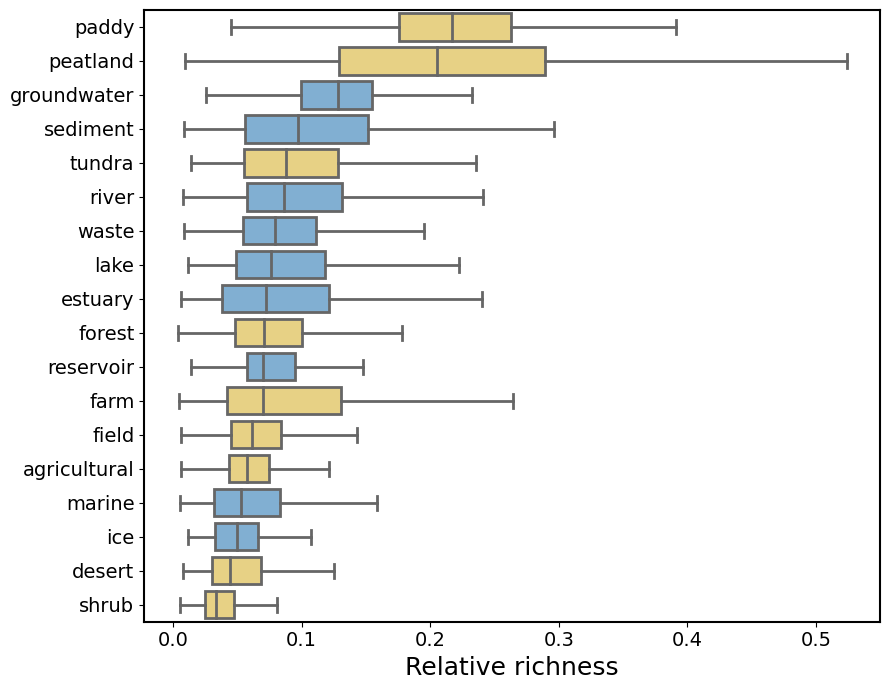

In [23]:
df55=df18_sorted 
color=category_colors
ig, ax = plt.subplots(figsize=(9,7), clear=True)
ax = sns.boxplot(y='env', x='richness', data=df55,
                 showfliers=False, palette=color,orient='h',linewidth=2)
ax.set_ylabel('')
ax.set_xlabel(f'Relative richness', fontsize=18)
ax.tick_params(axis='x', labelsize=11.5)
ax.tick_params(axis='y', labelsize=11.5)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['top'].set_linewidth(1.5)
save_fig(f'Relative abundance')

## Figure 2c

In [ ]:
! Rscript pcoa.R

## Figure 2d

In [62]:
df=pd.read_csv('data/df_assembly.csv')

In [66]:
df['env']=df['env'].str.capitalize()
df

,Unnamed: 0,env,sample,deterministic processes,stochastic processes
0,1799,Ice,99,3.742666,96.257334
1,1726,Ice,26,4.717554,95.282446
2,1727,Ice,27,4.795629,95.204371
3,1728,Ice,28,3.923948,96.076052
4,1729,Ice,29,3.421745,96.578255
...,...,...,...,...,...
1795,127,Peatland,27,18.787879,81.212121
1796,126,Peatland,26,18.630026,81.369974
1797,148,Peatland,48,29.965650,70.034350
1798,136,Peatland,36,24.914124,75.085876


In [64]:
ss=df.drop_duplicates('env')['env'].to_list()
ss

['ice',
 'marine',
 'groundwater',
 'lake',
 'sediment',
 'reservoir',
 'tundra',
 'waste',
 'estuary',
 'agricultural',
 'river',
 'farm',
 'field',
 'paddy',
 'desert',
 'shrub',
 'forest',
 'peatland']

In [65]:
color=[dicc[i] for i in ss]
color

['#74B1DF',
 '#74B1DF',
 '#74B1DF',
 '#74B1DF',
 '#74B1DF',
 '#74B1DF',
 '#F7DA75',
 '#74B1DF',
 '#74B1DF',
 '#F7DA75',
 '#74B1DF',
 '#F7DA75',
 '#F7DA75',
 '#F7DA75',
 '#F7DA75',
 '#F7DA75',
 '#F7DA75',
 '#F7DA75']

In [ ]:
dicc={'forest':'#F7DA75',
 'farm':'#F7DA75',
 'field':'#F7DA75',
 'agricultural':'#F7DA75',
 'peatland':'#F7DA75',
 'paddy':'#F7DA75',
 'desert':'#F7DA75',
 'tundra':'#F7DA75',
 'shrub':'#F7DA75',
 'sediment':'#74B1DF',
 'river':'#74B1DF',
 'waste':'#74B1DF',
 'lake':'#74B1DF',
 'marine':'#74B1DF',
 'reservoir':'#74B1DF',
 'groundwater':'#74B1DF',
 'estuary':'#74B1DF',
 'ice':'#74B1DF'}

C:\Users\panzh\AppData\Local\Temp\ipykernel_32620\3691916881.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=14)


Saving figure functional assembly


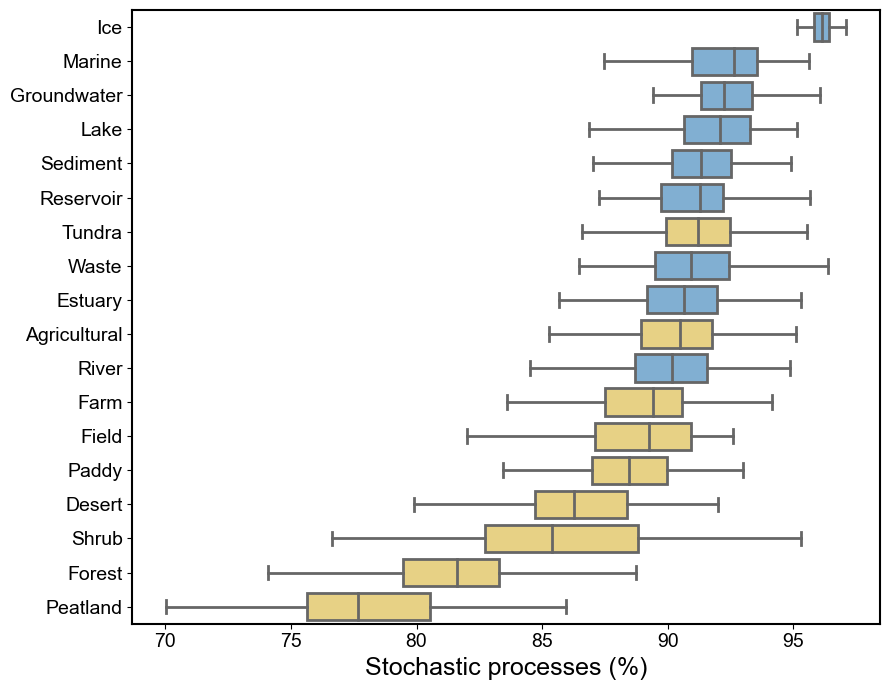

In [68]:
import seaborn as sns
df55 = df
ig, ax = plt.subplots(figsize=(9, 7), clear=True)
ax = sns.boxplot(y='env', x='stochastic processes', data=df55,
                 showfliers=False, palette=color, orient='h', linewidth=2)
ax.set_ylabel('')
ax.set_xlabel(f'Stochastic processes (%)', fontsize=18)
ax.tick_params(axis='x', labelsize=11.5)
ax.tick_params(axis='y', labelsize=11.5)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
ax.spines['bottom'].set_linewidth(1.5)  # 设置边框线宽为2.0
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['top'].set_linewidth(1.5)
save_fig(f'Figure 2d')